In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from random import seed
from random import randrange
# importing StandardScaler library        
from sklearn.preprocessing import StandardScaler

In [2]:
class PolynomialRegression:
    def __init__(self, degree=2, lr=0.001, n_iters=1000):
        self.degree = degree
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.scaler = None

    def fit(self, X, y, sample_weight=None):
        # Add polynomial features
        X_poly = self._polynomial_features(X, self.degree)

        # Normalize data
        self.scaler = StandardScaler()
        X_poly = self.scaler.fit_transform(X_poly)

        n_samples, n_features = X_poly.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X_poly, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X_poly.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        # Add polynomial features
        X_poly = self._polynomial_features(X, self.degree)

        # Normalize data
        X_poly = self.scaler.transform(X_poly)

        y_pred = np.dot(X_poly, self.weights) + self.bias
        return y_pred

    def _polynomial_features(self, X, degree):
        n_samples, n_features = X.shape
        X_poly = np.ones((n_samples, 1))

        for d in range(1, degree+1):
            for i in range(n_features):
                X_poly = np.concatenate((X_poly, (X[:,i]**d).reshape(-1,1)), axis=1)

        return X_poly

In [3]:
#d = datasets.load_boston()
#x, y = d.data, d.target

# Load Boston dataset
boston = datasets.load_boston()
X, y = boston.data, boston.target

C:\Users\Nagendra Swamy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

In [4]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

In [5]:
# Fit model and make predictions
reg = PolynomialRegression(degree=2, lr=0.01, n_iters=1000)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

In [6]:
from sklearn.metrics import r2_score 
r2score = r2_score(y_test, predictions)
print('R2 score:', r2score)

R2 score: 0.7906880716392194


In [7]:
from itertools import product

# define hyperparameters to tune
lr = [0.001, 0.01, 0.1]
n_iters = [1000, 5000, 10000]

# create all possible combinations of hyperparameters
hyperparameters = list(product(lr, n_iters))

# initialize best accuracy and corresponding hyperparameters
best_r2score = 0
best_hyperparameters = None

# loop over all hyperparameters
for hyperparameter in hyperparameters:
    # create a new instance of LinearRegression with the current hyperparameters
    lr = PolynomialRegression(lr=hyperparameter[0], n_iters=hyperparameter[1])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)
    
    # fit the model
    lr.fit(X_train, y_train)
 
    
    # evaluate the model on the validation set
    y_pred = lr.predict(X_test)
    r2score=r2_score(y_test, predictions)
    
    # update best accuracy and corresponding hyperparameters
    if r2score > best_r2score:
        best_r2score= r2score
        best_hyperparameters = hyperparameter
        
# print the best hyperparameters and corresponding accuracy
print("Best hyperparameters:", best_hyperparameters)
print("Validation r2score:", best_r2score)

Best hyperparameters: (0.001, 1000)
Validation r2score: 0.7906880716392194


# Model using Sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('C:/Users/Nagendra Swamy/Desktop/6000/HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
df = df.fillna(df.median())
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM'], df['CRIM'], df['NOX']], columns=['LSTAT', 'RM', 'CRIM', 'NOX'])
Y = df['MEDV']

print(X.shape)
print(Y.shape)

(506, 4)
(506,)


In [7]:
# splits the training and test data set in 75% : 25%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 4)
(127, 4)
(379,)
(127,)


In [8]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

print('Linear Regression coefficients: {}'.format(lm.coef_))
print('Linear Regression intercept: {}'.format(lm.intercept_))

# model evaluation for training set
y_train_predict = lm.predict(X_train)

# plt.plot(np.unique(Y_train), np.poly1d(np.polyfit(Y_train, y_train_predict, 1))(np.unique(Y_train)), 
#         linewidth=2, color='r')

# calculating the intercept and slope for the regression line
b, m = np.polynomial.polynomial.polyfit(Y_train, y_train_predict, 1)

Linear Regression coefficients: [-0.56649976  5.35239531 -0.13861706 -0.60246748]
Linear Regression intercept: -3.1562012904884504


In [9]:
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print("The linear model performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The linear model performance for training set
RMSE is 5.542915517308062
R2 score is 0.6384156083074264


In [10]:
# model evaluation for testing set
y_test_predict = lm.predict(X_test)

In [11]:
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
 
# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("\nThe linear model performance for testing set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The linear model performance for testing set
RMSE is 5.5299665348068725
R2 score is 0.6295124547192935


In [12]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, Y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))

In [13]:
# evaluating the model on training data-set
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
r2_train = r2_score(Y_train, y_train_predicted)
     
print("The polynomial model performance for the training set")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The polynomial model performance for the training set
RMSE of training set is 4.24827458820609
R2 score of training set is 0.7875981397531204


In [14]:
# evaluating the model on test data-set
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predicted))
r2_test = r2_score(Y_test, y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The polynomial model performance for the test set
RMSE of test set is 4.166238351476593
R2 score of test set is 0.7897108665470502


# Comparitive graph for accuracy of the models

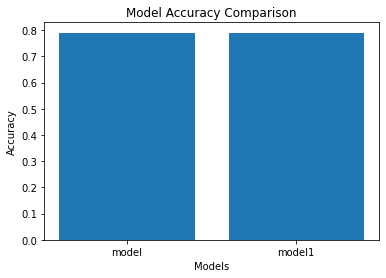

In [15]:
import matplotlib.pyplot as plt

# Define the accuracy scores for two different models
model_names = ['model', 'model1']
accuracy_scores = [0.7906880716392194, 0.7897108665470502]

# Create a bar chart of the accuracy scores
fig, ax = plt.subplots()
ax.bar(model_names, accuracy_scores)

# Set the chart title and labels
ax.set_title('Model Accuracy Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')

# Show the chart
plt.show()